# Tokenization

In [6]:
! wget -q https://www.dropbox.com/s/ug0b4pvuynwj4pe/news_science.zip && unzip news_science.zip

Archive:  news_science.zip
   creating: news_science/news1_txt/
  inflating: news_science/news1_txt/news1_1.txt  
  inflating: news_science/news1_txt/news1_10.txt  
  inflating: news_science/news1_txt/news1_11.txt  
  inflating: news_science/news1_txt/news1_12.txt  
  inflating: news_science/news1_txt/news1_13.txt  
  inflating: news_science/news1_txt/news1_14.txt  
  inflating: news_science/news1_txt/news1_15.txt  
  inflating: news_science/news1_txt/news1_16.txt  
  inflating: news_science/news1_txt/news1_17.txt  
  inflating: news_science/news1_txt/news1_18.txt  
  inflating: news_science/news1_txt/news1_19.txt  
  inflating: news_science/news1_txt/news1_2.txt  
  inflating: news_science/news1_txt/news1_20.txt  
  inflating: news_science/news1_txt/news1_21.txt  
  inflating: news_science/news1_txt/news1_22.txt  
  inflating: news_science/news1_txt/news1_23.txt  
  inflating: news_science/news1_txt/news1_24.txt  
  inflating: news_science/news1_txt/news1_25.txt  
  inflating: news_sc

In [7]:
import glob
import pandas as pd
from tqdm import tqdm


data = []
for path in glob.glob('./news_science/*'): # paths are [./news_science/news1_txt, ./news_science/sci.comp_txt]
  texts = []
  for filename in tqdm(glob.glob(path + '/*.txt')):
    texts.append(open(filename, 'r').read().strip()) # append trimmed content of each file in path to texts
  
  data.append(pd.DataFrame({'text': texts})) # append dataframe
  # get first 3 letters from last chain of path (news1_txt or sci.comp_txt) result: 'new' or 'sci'
  # and add column genre to the last dataframe in list
  data[-1]['genre'] = path.split('/')[-1][:3]

data = pd.concat(data) # data was a list of dataframes, now it is dataframe itself

100%|██████████| 79/79 [00:00<00:00, 6221.02it/s]


In [ ]:
data.sample(3)

,text,genre
27,"﻿Несмотря на частые заверения в обратном, фунд...",new
17,«Последнее восстание» в исполнении знаменитой ...,new
33,"УДК 004.896 \nВ.В. ВИШНЕВСКИЙ*, В.Г. КАЛМЫКОВ...",sci


### 1 Picture word clouds for scientific and news texts (wordcloud, no stopwords)

In [8]:
import nltk # NLTK (Natural Language Toolkit),
from nltk.corpus import stopwords # import stopwords like "a", "an", "the" etc.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re # regular expressions
nltk.download('stopwords')
nltk.download('punkt') # instruments for tokenization into words and sentances

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

nltk.word_tokenize() function is used for tokenization, which internally utilizes the "punkt" resource if it has been downloaded previously. So, technically, the nltk.download('punkt') call is not necessary for the 

```
nltk.word_tokenize(all_text.lower())
```

, as the "punkt" resource is not directly used.

However, it's generally recommended to download the necessary NLTK resources, including "punkt", at the beginning of the code or in a setup step, to ensure that all the required resources are available for various NLP tasks. So, it's good practice to keep the nltk.download('punkt') call in the code, even though it may not be explicitly used in this specific code.

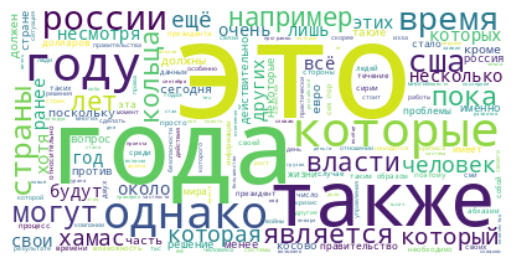

In [13]:
stop_words = set(stopwords.words('russian')) # A set of stop words in Russian is created using the stopwords module

def build_wordcloud(text):
  all_text = ' '.join(text) # All the texts in the input list are concatenated into a single string
  # cleaning is not necessary since we doing word.isalpha() which
  # checks if a string (in this case, a word) consists only of letters
  all_text = re.sub(r'[^\w\s]', '', all_text) # remove any non-alphanumeric characters (except whitespace)
  all_text = re.sub(r'\s+', ' ', all_text) # replace multiple consecutive whitespaces with single one

  words = nltk.word_tokenize(all_text.lower()) # tokenize into a list of words
  # A list comprehension is used to filter out non-alphabetic words and stop words from the list of words.
  # Only words consisting of alphabetic characters and not present in the stop_words set are included in the filtered_words list.
  filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
  # The WordCloud library expects a single string as input, where words are separated by spaces or other delimiters.
  wordcloud = WordCloud(background_color="white").generate(' '.join(filtered_words))
  # The generated word cloud is displayed as an image using the imshow() function from the pyplot module of the matplotlib library.
  # The interpolation parameter is set to 'bilinear' to specify the interpolation method for displaying the image.
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

build_wordcloud(data.loc[data['genre'] == 'new']['text']) # build cloud only 'new' genre

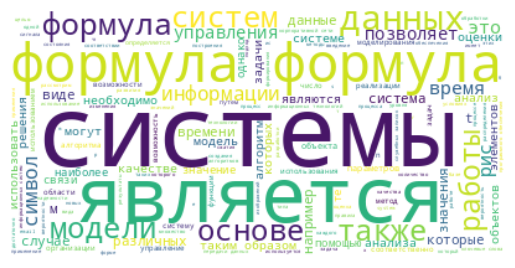

In [17]:
build_wordcloud(data.loc[data['genre'] == 'sci']['text']) # build cloud only 'sci' genre

### 3 Find frequency n-grams of news and scientific articles

In [58]:
import string
import nltk
from nltk.tokenize import word_tokenize

tokenizer = nltk.tokenize.WordPunctTokenizer()

# print(tokenizer.tokenize(data[data.genre == 'new'].text[0]))
# list of lists
data['text_tokenized'] = data.text.map(lambda row: [token.lower() for token in tokenizer.tokenize(row)])

# remove from list of tokens those which are punctuation or numbers
def is_symbol(tok):
  # all returns true if all chars in token are puntuation chars or false otherwise
  return all(char in string.punctuation for char in tok)

def clean_tokens(tokens):
  # tokens = [tok for tok in tokens if not tok.isdigit()]
  return [tok for tok in tokens if not is_symbol(tok) and not tok.isdigit()]

# I'd rather clean all texts with regular expressions than use isdigit() and punctuation filtering in loops
# also it's better change all texts to lower case in one operation rather than using loops for tokens
data['text_tokenized'] = data.text_tokenized.map(clean_tokens)

for item in data['text_tokenized'][:5]:
    print(item[:5])

['разработка', 'программного', 'комплекса', 'для', 'нового']
['проблема', 'интеграции', 'локальных', 'автоматизированных', 'систем']
['компьютерные', 'системы', 'и', 'информационные', 'технологии']
['удк', 'методика', 'оценки', 'надежности', 'вычислительной']
['\ufeff', 'в', 'а', 'чулков', 'а']


In [66]:
import nltk

def create_bigram(tokens):
    bigrams = nltk.bigrams(tokens)
    return list(bigrams)

# get tokens only for news
tokens_news = [token for row in data[data.genre == 'new'].text_tokenized.values for token in row]
bigrams_list = create_bigram(tokens_news)
bigrams_news = [" ".join(bigram) for bigram in list(bigrams_list)]

print(bigrams_news[:10])
assert bigrams_news[:3] == ['африка в', 'в последние', 'последние недели']
print("Test passed")

['африка в', 'в последние', 'последние недели', 'недели не', 'не исчезает', 'исчезает из', 'из фокуса', 'фокуса внимания', 'внимания мировых', 'мировых сми']
Test passed


In [67]:
# Create a bigram frequency counter
from collections import Counter, OrderedDict

# Function for sorting n-grams by frequency of occurrence in the list
# Returns an ordered dictionary (OrderedDict) 
def sort_by_frequency(list_of_ngrams, reverse=True):
    # Create a counter to calculate the frequency of occurrence of each n-gram
    data_with_freq = Counter(list_of_ngrams)
    
    # Sort the counter in descending order
    return OrderedDict(sorted(data_with_freq.items(), key=lambda x: x[1], reverse=reverse))

bigrams_news_sorted = sort_by_frequency(bigrams_news)

print(list(bigrams_news_sorted.items())[:10])
assert type(bigrams_news_sorted) == OrderedDict
assert bigrams_news_sorted.get('национальной безопасности') == 4
print('Tests passed')

[('в году', 65), ('том что', 59), ('то что', 47), ('о том', 45), ('а также', 43), ('в россии', 37), ('несмотря на', 35), ('в том', 34), ('и в', 33), ('в течение', 30)]
Tests passed
